<a href="https://colab.research.google.com/github/SamuelBFG/DL-studies/blob/master/IA353/EFC1p3_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


# BASELINE MODEL

In [4]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512, activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 4s 2ms/step - loss: 2.2231 - accuracy: 0.1860
Epoch 2/5
1563/1563 [==============================] - 4s 2ms/step - loss: 2.0095 - accuracy: 0.2427
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9853 - accuracy: 0.2599
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9798 - accuracy: 0.2613
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9718 - accuracy: 0.2646


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8458 - accuracy: 0.3358


[1.8458298444747925, 0.3357999920845032]

#### Plot

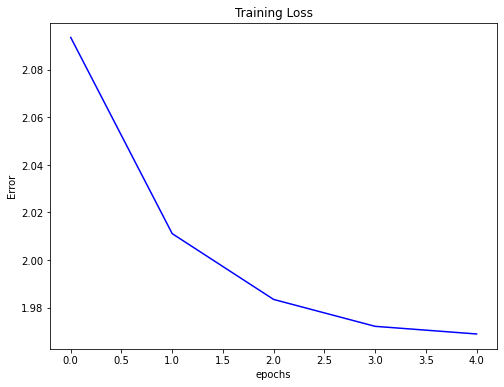

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b')
plt.title('Training Loss')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.show()

### Working with multiples executions:

In [8]:
executions = 5
histories = []
evaluations = []

for i in range(executions):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                      ])
  
  print('## Training model number: ', i+1)

  model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
  
  histories.append(model.fit(x_train, y_train, epochs=5, verbose=0))

  print('#• Test set:')
  evaluations.append(model.evaluate(x_test, y_test))
  print('\n')

## Training model number:  1
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 1.8195 - accuracy: 0.3470


## Training model number:  2
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 1.8762 - accuracy: 0.3264


## Training model number:  3
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 1.9506 - accuracy: 0.2882


## Training model number:  4
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 1.8850 - accuracy: 0.3136


## Training model number:  5
#• Test set:
313/313 [==============================] - 1s 2ms/step - loss: 1.9029 - accuracy: 0.3100




In [9]:
histories[0].history.keys()

dict_keys(['loss', 'accuracy'])

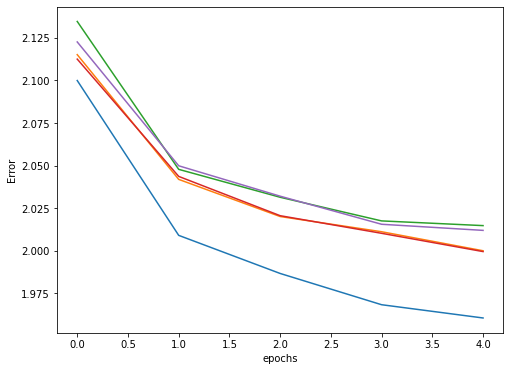

In [10]:
plt.figure(figsize=(8, 6))  
plt.xlabel('epochs')
plt.ylabel('Error')
for i in range(executions):
  plt.plot(histories[i].history['loss'])
plt.show()

In [11]:
histories[-1].history['accuracy'] # Last training acc log per epochs

[0.1950799971818924,
 0.21877999603748322,
 0.2261199951171875,
 0.23263999819755554,
 0.23287999629974365]

In [12]:
evaluations[0] # Loss and acc for the first model (LIST)

[1.8195173740386963, 0.34700000286102295]

In [13]:
acc_val = []
acc_test = []

for i in range(executions):
  acc_val.append(sum(histories[i].history['accuracy']) / len(histories[i].history['accuracy']))
  acc_test.append(evaluations[i][1])

acc_val

[0.24992000162601472,
 0.23153600096702576,
 0.22798400223255158,
 0.22813200056552888,
 0.22109999656677246]

In [14]:
acc_test

[0.34700000286102295,
 0.3264000117778778,
 0.2881999909877777,
 0.31360000371932983,
 0.3100000023841858]

#### Average validation accuracy (training set)

In [15]:
avg_acc_val = sum(acc_val)/len(acc_val)
avg_acc_val

0.23173440039157867

#### Average test accuracy

In [16]:
avg_acc_test = sum(acc_test)/len(acc_test)
avg_acc_test

0.3170400023460388

# MODIFIED MODEL

• Goal: Better test accuracy results

### Holdout:

In [17]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


One-hot encoding train and test labels:

In [18]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

20% for validation set

80% for training set

In [19]:
from sklearn.model_selection import train_test_split
train_data, train_data_val, train_labels, train_labels_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=261663)

In [ ]:
print('train_data shape:', x_train.shape)
print('train_data_val shape:', train_data_val.shape)
print('train_labels shape:', y_train.shape)
print('train_labels_val shape:', train_labels_val.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

### Model

Inspired by [LeNet-5, 1998](https://ieeexplore.ieee.org/document/726791), the architecture follows the structure: conv->pool->conv->pool->fc->output

Modifications:

• Adam with learning rate 0.001

• Mini-batch size of 64

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D


model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu', input_shape = (32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

In [25]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        12832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               524544    
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [26]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(lr=0.001),
              loss = "categorical_crossentropy",
              metrics=["accuracy"])

In [27]:
history = model.fit(train_data, train_labels,
                    batch_size = 64, 
                    epochs = 25, 
                    validation_data = (train_data_val, train_labels_val), verbose = 2)

Epoch 1/25
625/625 - 32s - loss: 1.5242 - accuracy: 0.4498 - val_loss: 1.2589 - val_accuracy: 0.5517
Epoch 2/25
625/625 - 2s - loss: 1.1647 - accuracy: 0.5873 - val_loss: 1.1071 - val_accuracy: 0.6109
Epoch 3/25
625/625 - 2s - loss: 1.0034 - accuracy: 0.6474 - val_loss: 1.0944 - val_accuracy: 0.6123
Epoch 4/25
625/625 - 2s - loss: 0.8797 - accuracy: 0.6928 - val_loss: 0.9832 - val_accuracy: 0.6534
Epoch 5/25
625/625 - 2s - loss: 0.7803 - accuracy: 0.7283 - val_loss: 0.9433 - val_accuracy: 0.6749
Epoch 6/25
625/625 - 2s - loss: 0.6763 - accuracy: 0.7637 - val_loss: 0.9524 - val_accuracy: 0.6799
Epoch 7/25
625/625 - 2s - loss: 0.5734 - accuracy: 0.7990 - val_loss: 0.9932 - val_accuracy: 0.6803
Epoch 8/25
625/625 - 2s - loss: 0.4805 - accuracy: 0.8323 - val_loss: 1.0246 - val_accuracy: 0.6806
Epoch 9/25
625/625 - 2s - loss: 0.3854 - accuracy: 0.8679 - val_loss: 1.1130 - val_accuracy: 0.6775
Epoch 10/25
625/625 - 2s - loss: 0.3077 - accuracy: 0.8937 - val_loss: 1.2232 - val_accuracy: 0.676

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.8984 - accuracy: 0.6381


[2.8984344005584717, 0.6381000280380249]

## Plot

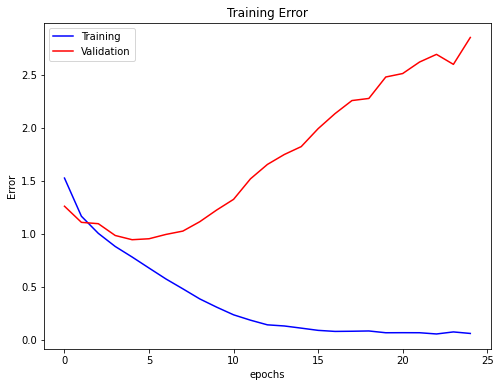

In [31]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="Validation loss")
plt.title('Training Error')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.legend(('Training Loss', 'Validation Loss'))
plt.show()